In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ev_co = pd.read_csv("ev_co2_final.csv")

In [19]:
ev_co.drop("Unnamed: 0", axis=1, inplace=True)

In [47]:
print(f"The present table contains information on Electric Vehicle (EV) sales and CO2 emissions \n across {ev_co["country"].nunique()} countries and {ev_co["year"].nunique()} years, including: \n Countries: {ev_co["country"].unique()} \n Years: {ev_co["year"].unique()}")

The present table contains information on Electric Vehicle (EV) sales and CO2 emissions 
 across 46 countries and 12 years, including: 
 Countries: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'India' 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa'
 'Spain' 'Sweden' 'Switzerland' 'USA' 'United Arab Emirates'
 'United Kingdom'] 
 Years: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2010]


In [43]:
ev_co

,country,year,ev_sales,co2_metric_tons
0,Australia,2011,98,403.83
1,Australia,2012,550,406.15
2,Australia,2013,880,397.89
3,Australia,2014,3200,393.95
4,Australia,2015,5360,401.79
...,...,...,...,...
435,United Kingdom,2017,178070,387.37
436,United Kingdom,2018,248109,379.73
437,United Kingdom,2019,326242,364.75
438,United Kingdom,2020,588299,326.26


In [97]:
ev_co.dtypes

country             object
year                 int64
ev_sales             int64
co2_metric_tons    float64
dtype: object

## Summary Statistics

In [33]:
ev_co[["ev_sales", "co2_metric_tons"]].describe().astype(int)

,ev_sales,co2_metric_tons
count,440,440
mean,141295,673
std,696246,1833
min,3,0
25%,491,40
50%,4119,83
75%,39460,417
max,11073857,11472


In [50]:
ev_co.describe().astype(int)

,year,ev_sales,co2_metric_tons
count,440,440,440
mean,2016,141295,673
std,3,696246,1833
min,2010,3,0
25%,2014,491,40
50%,2017,4119,83
75%,2019,39460,417
max,2021,11073857,11472


In [61]:
ev_co[ev_co["ev_sales"] == ev_co["ev_sales"].max()]

,country,year,ev_sales,co2_metric_tons
88,China,2021,11073857,11472.37


<Axes: xlabel='ev_sales', ylabel='co2_metric_tons'>

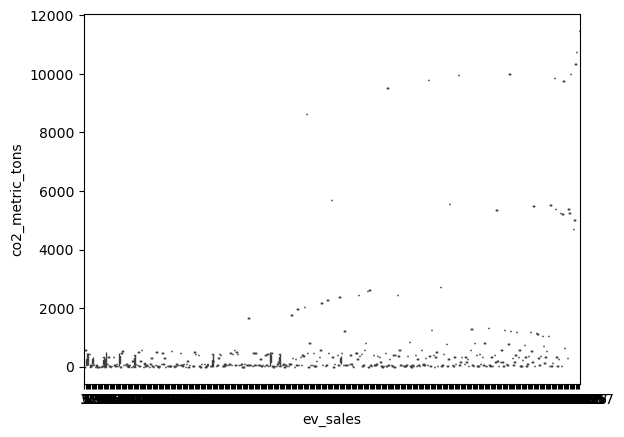

In [35]:
import seaborn as sns

sns.boxplot(x='ev_sales', y='co2_metric_tons', data=ev_co)

In [40]:
ev_co_matrix = ev_co[["ev_sales", "co2_metric_tons"]].corr()
ev_co_matrix

,ev_sales,co2_metric_tons
ev_sales,1.000000,0.590997
co2_metric_tons,0.590997,1.000000


<Axes: >

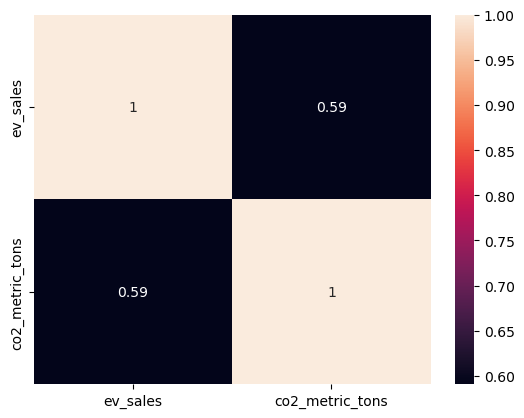

In [41]:
sns.heatmap(ev_co_matrix, annot=True)

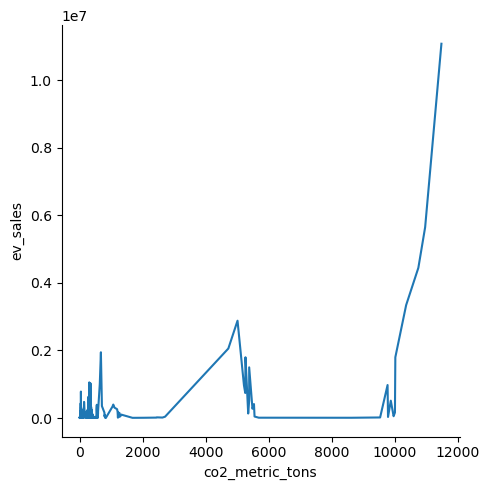

In [63]:
sns.relplot(data=ev_co, x="co2_metric_tons", y="ev_sales", kind="line")

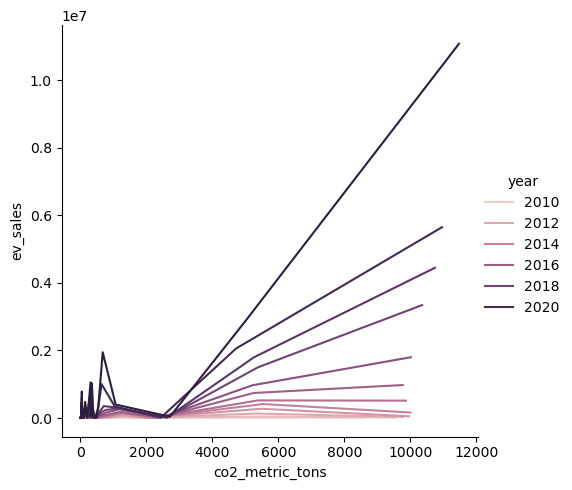

In [62]:
sns.relplot(
    data=ev_co, kind="line",
    x="co2_metric_tons", y="ev_sales", hue="year",
)

In [80]:
# Top 10 EV buyer countries
top10ev = pd.read_csv("top10_ev_buyers.csv")
top10ev = ev_co[ev_co["country"].isin(top10ev["country"])]
top10ev = top10ev.reset_index()
top10ev

,index,country,year,ev_sales,co2_metric_tons
0,54,Canada,2010,5,556.56
1,55,Canada,2011,1075,567.05
2,56,Canada,2012,4355,568.22
3,57,Canada,2013,8605,572.61
4,58,Canada,2014,15805,569.84
...,...,...,...,...,...
115,435,United Kingdom,2017,178070,387.37
116,436,United Kingdom,2018,248109,379.73
117,437,United Kingdom,2019,326242,364.75
118,438,United Kingdom,2020,588299,326.26


Text(0.5, 1.0, 'Top 10 EV buyer countries by EV sales')

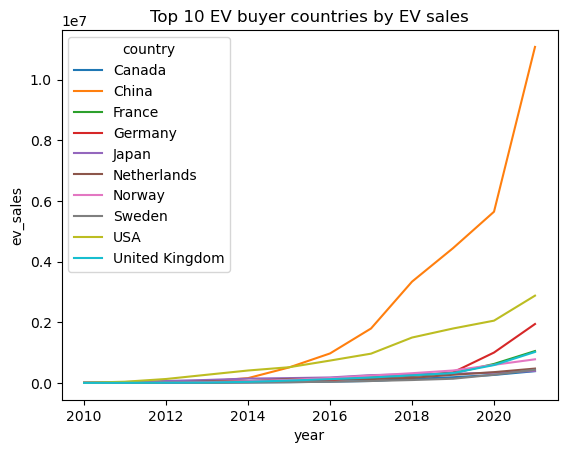

In [91]:
sns.lineplot(data=top10ev, x='year', y='ev_sales', hue='country')
plt.title("Top 10 EV buyer countries by EV sales")

Text(0.5, 1.0, 'Top 10 EV buyer countries by CO2 emissions')

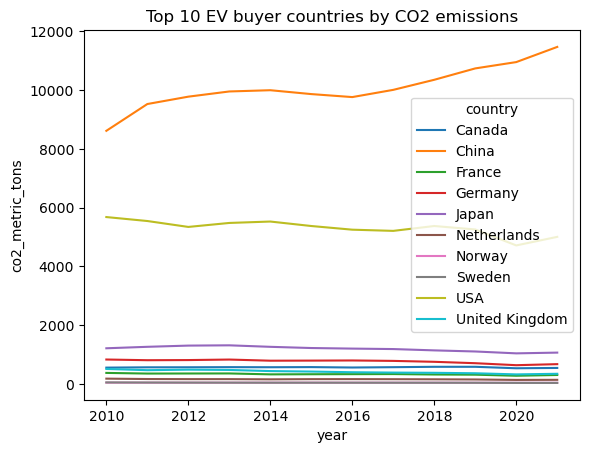

In [89]:
sns.lineplot(data=top10ev, x='year', y='co2_metric_tons', hue='country')
plt.title("Top 10 EV buyer countries by CO2 emissions")

In [92]:
# Top 10 EV buyer countries
top10co = pd.read_csv("top10_co2.csv")
top10co = ev_co[ev_co["country"].isin(top10co["country"])]
top10co = top10co.reset_index()
top10co

,index,country,year,ev_sales,co2_metric_tons
0,0,Australia,2011,98,403.83
1,1,Australia,2012,550,406.15
2,2,Australia,2013,880,397.89
3,3,Australia,2014,3200,393.95
4,4,Australia,2015,5360,401.79
...,...,...,...,...,...
113,435,United Kingdom,2017,178070,387.37
114,436,United Kingdom,2018,248109,379.73
115,437,United Kingdom,2019,326242,364.75
116,438,United Kingdom,2020,588299,326.26


Text(0.5, 1.0, 'Top 10 EV most polluting countries by EV sales')

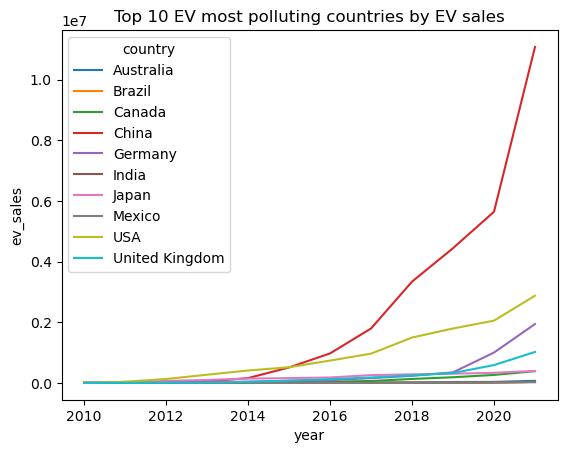

In [93]:
sns.lineplot(data=top10co, x='year', y='ev_sales', hue='country')
plt.title("Top 10 EV most polluting countries by EV sales")

Text(0.5, 1.0, 'Top 10 most polluting countries by CO2 emissions')

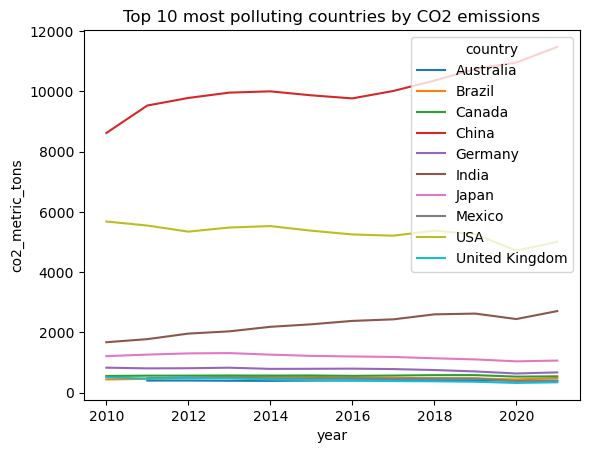

In [98]:
sns.lineplot(data=top10co, x='year', y='co2_metric_tons', hue='country')
plt.title("Top 10 most polluting countries by CO2 emissions")

<Axes: xlabel='co2_metric_tons', ylabel='ev_sales'>

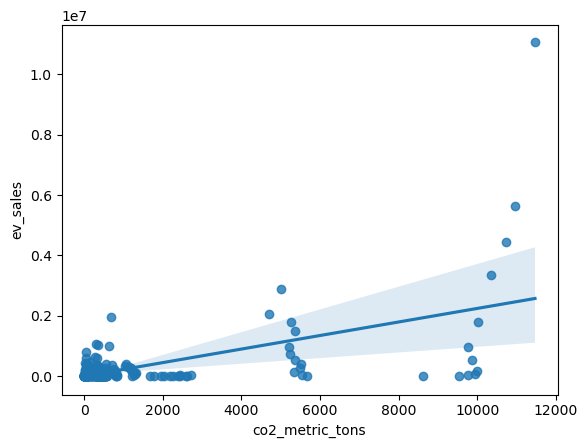

In [109]:
sns.regplot(x="co2_metric_tons", y="ev_sales", data=ev_co)

In [106]:
ev_co.groupby("country")["ev_sales"].diff()

0           NaN
1         452.0
2         330.0
3        2320.0
4        2160.0
         ...   
435     54059.0
436     70039.0
437     78133.0
438    262057.0
439    431974.0
Name: ev_sales, Length: 440, dtype: float64